<div class="alert alert-block alert-info">
Singapore Management University<br>
CS105 Statistical Thinking for Data Science, 2024/25 Term 2
</div>

# CS105 Group Project Submission (Part I)

-----
Provide your team details, including section, team number, team members, and the name of the dataset. 
Complete all of the following sections. For any part requiring code to derive your answers, please create a code cell immediately below your response and run the code.
To edit any markdown cell, double click the cell; after editing, execute the markdown cell to collapse it.
<br>
-----

## Declaration

<span style="color:red">By submitting this notebook, we declare that **no part of this submission is generated by any AI tool**. We understand that AI-generated submissions will be considered as plagiarism, and just like other plagirisum cases, disciplinary actions will be imposed.</span>

#### Section:   G5
#### Team:      T1
#### Members:
1. Zachary Tay
2. Bryan Lee
3. Ang Qi Long
4. Jonathan Wong
5. Swayam Jain

#### Dataset: Employee

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

df = pd.read_csv('employee.csv')

## Part I: Exploratory Data Analysis (EDA) [8% of final grade]

### 1. Overview of dataset [15% of Part I]

**a.** Summarise the background of the dataset [limited to 50 words]

<div style="text-align: justify;">
This dataset contains <b>HR data of all employees under a sales team</b>. The data includes <b>personal and employment details</b>, <b>total career sales acquired</b> and <b>latest quarterly rating</b>. An employee’s data is <b>captured at the beginning of each month</b>, either <b>up to the latest month</b> (Dec 2017) or <b>when they quit</b>.
</div>


**b.** State the size of the dataset

**Size**
- **Rows**: 2381
- **Columns**: 13


In [2]:
n_rows, n_cols = df.shape
print(f"{n_rows} Rows")
print(f"{n_cols} Columns")

2381 Rows
13 Columns


**c.** For each variable, describe what it represents and its data type (numerical or categorical)

**Date**
- **Type**: Categorical (?Nominal?)<br>
- **Info**: The date when the specific row’s data is recorded 

**Emp_ID**
- **Type**: Categorical (Nominal)<br>
- **Info**: The unique ID of the employee

**Age**
- **Type**: Numerical (Discrete)<br>
- **Info**: The age of the employee
  
**Gender**
- **Type**: Categorical (Nominal)<br>
- **Info**: The employee’s gender (Male or Female)

**City**
- **Type**: Categorical (?)<br>
- **Info**: The city where the employees works in (C1, C2, ..., C29)

**Education**
- **Type**: Categorical (Ordinal)<br>
- **Info**: Highest education of the employee (College, Bachelor, Master)

**Salary**
- **Type**: Numerical (Discrete)<br>
- **Info**: Current salary of the employee excluding bonus 

**Join_Date**
- **Type**: Categorical (?Nominal?)<br>
- **Info**: The date when the employee joins the company

**Last_Work_Date**
- **Type**: Categorical (?Nominal?)<br>
- **Info**: The data when the employee leaves the company, otherwise empty if employee has not quit

**Join_Designation**
- **Type**: Categorical (Ordinal)<br>
- **Info**: Designation level when the employee joined the company (1, 2, 3, 4, 5)

**Designation**
- **Type**: Categorical (Ordinal)<br>
- **Info**: Current designation level of the employee (1, 2, 3, 4, 5)

**Total_Sales**
- **Type**: Numerical (Discrete)<br>
- **Info**: Total sales generated by the employee since joining the team

**Quarterly_Rating**
- **Type**: Categorical (Ordinal)<br>
- **Info**: Last quarterly performance rating (1, 2, 3, 4)


****

### 2. Data pre-processing [35% of Part I]

**a.** For each variable, determine the percentage of missing data. For any column with missing data, describe how you resolve the issue. Clearly state any assumption you made.

| Variable w/ Missing Data | Count | Percentage |
| :---------------- | :------: | ----: |
| Join_Date | 118 | 4.96% |
| Last_Work_Date | 765 | 32.13% |
| Join_Designation | 105 | 4.41% |  



In [3]:
def displayMissing() :
    missing_count = df.shape[0] - df.count()              # total rows - rows with non-null values
    missing_percent = (missing_count / df.shape[0] * 100) # missing rows / total rows

    missing_data = pd.DataFrame({'Count': missing_count, 'Percentage': round(missing_percent,2)})
    missing_data = missing_data[missing_data['Count'] > 0]  # filter out variable w/o missing data

    return missing_data

displayMissing()

,Count,Percentage
Join_Date,118,4.96
Last_Work_Date,765,32.13
Join_Designation,105,4.41


#### Join Date
- **Resolution**: Drop all rows with missing `Join_Date`
- **Reason**: As data of an employee is updated every month, there is no past record to check for their join date. We therefore cannot reasonably accertain when they joined the sales team. Additionally, as the duration of employement will impact other variables and the percentage of missing data is not too high (4.96%), we opted to drop these rows with missing `Join_Date`
- **Assumption(s)**:
    - Each employee will only have one Emp_ID unique to them
    - An employee who had quit will not join the sales team again nor gain a new Emp_ID

In [4]:
df.dropna(subset=['Join_Date'], inplace = True)         # drop all rows with null values under Join_Date
displayMissing()                                        # Join_Date count is 0 (LWD & JD are affected)

,Count,Percentage
Last_Work_Date,728,32.17
Join_Designation,102,4.51


#### Last Work Date
- **Resolution**: Drop rows with missing `Last_Work_Date` **and** `Date` that is earlier than 1/12/2017
- **Reason**: Only the rows before the latest month (Dec 2017) are affected as an older `Date` suggests that an employee is no longer with the sales team. The rows with missing data captured in the latest month informs us that the employee is still working for the sales team. We again cannot reasonably accertain when the employee quit as an employee can quit at anytime in a given month and an employee can make any number of sales in that time period, thus impacting other variables. Therefore, as the number and percentage of affected rows is not too high (24, 1.06%), we opted to drop these rows with missing `Last_Work_Date`. 
- **Assumption(s)**:
    - There is no delay in capturing when an employee's last date of work was

In [5]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

unknownLastDate = df[(df['Last_Work_Date'].isnull()) & (df['Date'] < '2017-12-01')].shape[0]
print("Unknown Last Date:", unknownLastDate, round(unknownLastDate / df.shape[0] * 100, 2), "%")

stillWorking = df[(df['Last_Work_Date'].isnull()) & (df['Date'] == '2017-12-01')].shape[0]
print("Still Working:", stillWorking, round(stillWorking / df.shape[0] * 100, 1), "%")

Unknown Last Date: 24 1.06 %
Still Working: 704 31.1 %


In [6]:
unknownLastDate = df[(df['Last_Work_Date'].isnull()) & (df['Date'] < '2017-12-01')]     # splice out rows where Date is before Dec 2017
df.drop(unknownLastDate.index, inplace=True)                                            # use index of unknownLastDate and drop row
displayMissing()                                                                        # Last_Work_Date is 704, only 24 records dropped

,Count,Percentage
Last_Work_Date,704,31.44
Join_Designation,100,4.47


#### Join_Designation
- **Resolution**: For rows with missing `Join_Designation`, impute those where `Designation == 1` with 1 and drop rows where `Designation > 1`
- **Reason**: As `Designation` captures the current designation level of an employee when their data was recorded, if current designation level is 1, then we can definitvely deduce that the `Join_Designation` is 1 too. For any higher current designation level than 1, we again cannot reasonably accertain their initial designation level as it likely varies with other variables. As the number and percentage of rows missing data where `Designation > 1`  is not too high (78, 3.48%), we opted to drop these rows and impute those where where `Designation == 1` is 1 (22, 0.983%) with 1  
- **Assumption(s)**: -  

In [7]:
cdIs1 = df[(df['Join_Designation'].isnull()) & (df['Designation'] == 1)].shape[0]
cdNot1 = df[(df['Join_Designation'].isnull()) & (df['Designation'] != 1)].shape[0]

print("(Current) Designation = 1:", cdIs1, round(cdIs1 / df.shape[0] * 100, 3), "%")
print("(Current) Designation > 1:", cdNot1, round(cdNot1 / df.shape[0] * 100, 2), "%")

(Current) Designation = 1: 22 0.983 %
(Current) Designation > 1: 78 3.48 %


In [8]:
cdNot1 = df[(df['Join_Designation'].isnull()) & (df['Designation'] != 1)]   # splice out rows where designation > 1
df.drop(cdNot1.index, inplace=True)                                         # use index of cdNot1 and drop row
# print(cdNot1.shape[0])

cdIs1 = df[(df['Join_Designation'].isnull()) & (df['Designation'] == 1)]    # splice out rows where designation is 1
# print(cdIs1.iloc[cdIs1[cdIs1["Emp_ID"]==21].index])
df.loc[cdIs1.index, "Join_Designation"] = 1                                 # use index of cdIs1 and impute row with 1
# print(cdIs1.shape[0])
# print(df.iloc[df[df["Emp_ID"]==21].index])

df['Join_Designation'] = df['Join_Designation'].astype(int)                 # convert imputed float (1.0) to int (1)
# print(df.iloc[df[df["Emp_ID"]==21].index])
displayMissing()                                                            # Join_Designation count is 0 (LWD affected)

,Count,Percentage
Last_Work_Date,668,30.91


**Size after Cleaning**
- **Rows**: 2161
- **Columns**: 13

In [9]:
n_rows, n_cols = df.shape
print(f"{n_rows} Rows")
print(f"{n_cols} Columns")

2161 Rows
13 Columns


-----
**b.** For each variable, identify outliers (if any) and describe how you resolve the issue. Clearly state any assumption you made.

#### Total Sales Acquired
There exists rows with negative `Total_Sales_Acquired`.
- **Resolution**: Drop such rows with negative `Total_Sales_Acquired`
- **Reason**: Total sales acquired should minimally be 0, not negative. We should not absolute these negative values or impute with 0 as we cannot reasonably accertain true total sales.
- **Assumption(s)**:
    - Dataset does not keep track whether an employee caused a loss of sales

In [10]:
negativeSales = df[df['Total_Sales_Acquired'] < 0]  
df.drop(negativeSales.index, inplace=True)

There exists 308 outlier rows with `Total_Sales_Acquired` above upper bound.
- **Resolution**: Keep these outlier rows
- **Reason**: These outlier data are likely correlated to employees who have either worked for the sales team for a long period of time or have a high designation level. As such, these outlier should be kept for our data analysis later on. 
- **Assumption(s)**: -

In [11]:
Q1 = df["Total_Sales_Acquired"].quantile(0.25)
Q3 = df["Total_Sales_Acquired"].quantile(0.75)
lower = Q1 - 1.5 * (Q3-Q1)                          # Lower bound is -6084435; Need not check as no total sales is negative
upper = Q3 + 1.5 * (Q3-Q1)                          # Upper bound is 10140725

df[df['Total_Sales_Acquired'] >= upper].shape[0]

308

----
**c.** For categorical variables, perform the necessary encoding.

#### Emp_ID, Join_Designation, Designation, Quarterly_Rating

These categorical variables are stored as `int` and therefore need not be encoded.

#### Gender
Binary (nominal) variable; To apply binary encoding 
|Value|Encoded|
|:-:|:-:|
|Male|0|
|Female|1|

In [12]:
gender_encoding = {"Male":0, "Female":1} 
df["Gender_Encoded"] = df["Gender"].map(gender_encoding)  # map Gender column using encoding

df[["Date", "Emp_ID", "Gender", "Gender_Encoded"]].head()

,Date,Emp_ID,Gender,Gender_Encoded
0,2016-03-01,1,Male,0
2,2017-04-01,4,Male,0
3,2016-03-01,5,Male,0
4,2017-12-01,6,Female,1
5,2017-11-01,8,Male,0


#### City
Ordinal variable; To apply ordinal encoding
Extract city number
|Value|Encoded|
|:-:|:-:|
|C1|1|
|C2|2|
|...|...|
|C28|28|
|C29|29|

In [13]:
city_encoding = {"C1":1, "C2":2, "C3":3, "C4":4 ,"C5":5 ,"C6":6,"C7":7,"C8":8,"C9":9,"C10":10,"C11":11, "C12":12, "C13":13, "C14":14, "C15":15 ,"C16":16 ,"C17":17,"C18":18,"C19":19,"C20":20,"C21":21,"C22":22, "C23":23, "C24":24, "C25":25, "C26":26 ,"C27":27 ,"C28":28,"C29":29}

df["City_Encoded"] = df["City"].map(city_encoding) #map City column using encoding

df[["Date", "Emp_ID", "City", "City_Encoded"]].head()


,Date,Emp_ID,City,City_Encoded
0,2016-03-01,1,C23,23
2,2017-04-01,4,C13,13
3,2016-03-01,5,C9,9
4,2017-12-01,6,C11,11
5,2017-11-01,8,C2,2


#### Education
Ordinal variable; To apply ordinal encoding
|Value|Encoded|
|:-:|:-:|
|College|0|
|Bachelor|1|
|Master|2|

In [14]:
education_encoding = {"College":0, "Bachelor":1, "Master":2} 
df["Education_Encoded"] = df["Education"].map(education_encoding)  # map Gender column using encoding

df[["Date", "Emp_ID", "Education", "Education_Encoded"]].head()

,Date,Emp_ID,Education,Education_Encoded
0,2016-03-01,1,Master,2
2,2017-04-01,4,Master,2
3,2016-03-01,5,College,0
4,2017-12-01,6,Bachelor,1
5,2017-11-01,8,College,0


#### Date _(when info was recorded)_
Convert date string to pandas Timestamp <br>
Splice month and year from `Date`<br>
Day is not needed as data is always captured at beginning of each month (i.e. 1st)

In [15]:
# df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)  # already converted above

df["Recorded_Month"] = df['Date'].dt.month
df["Recorded_Year"] = df['Date'].dt.year

df[["Date", "Emp_ID", "Recorded_Month", "Recorded_Year"]].head()

,Date,Emp_ID,Recorded_Month,Recorded_Year
0,2016-03-01,1,3,2016
2,2017-04-01,4,4,2017
3,2016-03-01,5,3,2016
4,2017-12-01,6,12,2017
5,2017-11-01,8,11,2017


#### Join_Date
Convert date string to pandas Timestamp <br>
Splice day, month and year from `Join_Date`<br>

In [16]:
df['Join_Date'] = pd.to_datetime(df['Join_Date'], dayfirst=True)  

df["Join_Day"] = df['Join_Date'].dt.day
df["Join_Month"] = df['Join_Date'].dt.month
df["Join_Year"] = df['Join_Date'].dt.year

df[["Emp_ID", "Join_Date", "Join_Day", "Join_Month", "Join_Year"]].head()

,Emp_ID,Join_Date,Join_Day,Join_Month,Join_Year
0,1,2015-12-24,24,12,2015
2,4,2016-12-07,7,12,2016
3,5,2016-01-09,9,1,2016
4,6,2017-07-31,31,7,2017
5,8,2017-09-19,19,9,2017


#### Last_Work_Date
Convert date string to pandas Timestamp <br>
Splice day, month and year from `Last_Work_Date`<br>
For rows with empty `Last_Work_Date`, day, month and year are set to null

In [17]:
df['Last_Work_Date'] = pd.to_datetime(df['Last_Work_Date'], dayfirst=True)  

df["LWD_Day"] = df['Last_Work_Date'].dt.day
df["LWD_Month"] = df['Last_Work_Date'].dt.month
df["LWD_Year"] = df['Last_Work_Date'].dt.year

df[["Emp_ID", "Last_Work_Date", "LWD_Day", "LWD_Month", "LWD_Year"]].head()

,Emp_ID,Last_Work_Date,LWD_Day,LWD_Month,LWD_Year
0,1,2016-03-11,11.0,3.0,2016.0
2,4,2017-04-27,27.0,4.0,2017.0
3,5,2016-03-07,7.0,3.0,2016.0
4,6,NaT,NaN,NaN,NaN
5,8,2017-11-15,15.0,11.0,2017.0


----
### 3.	Exploratory analysis and visualization [50% of Part I]

**a.** For each variable, provide relevant summary statistics

**Response.** 

In [18]:
df[["Total_Sales_Acquired"]].describe()

,Total_Sales_Acquired
count,2.151000e+03
mean,4.576498e+06
std,9.166916e+06
min,0.000000e+00
25%,0.000000e+00
50%,8.256000e+05
75%,4.056290e+06
max,9.533106e+07


**b.** For each variable, provide an appropriate visualisation depicting the distribution of its values, and summarize any key observation(s) you made.

#### Age
- **Key Observation(s)**: -

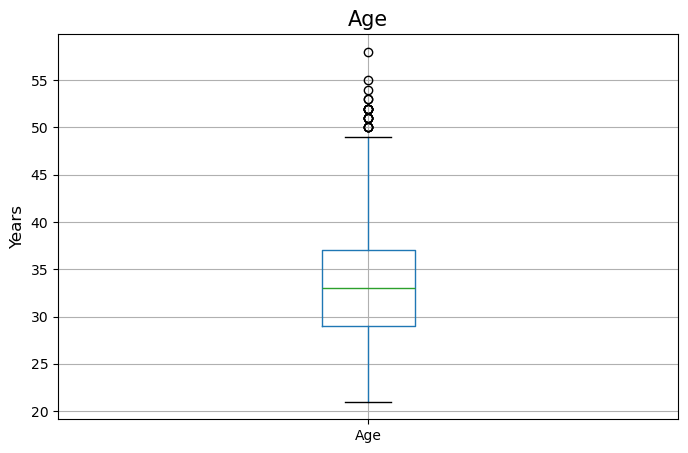

In [19]:
plt.figure(figsize=(8,5))
df[["Age"]].boxplot()
plt.title("Age", fontsize=15)
plt.ylabel("Years", fontsize=12)
plt.show()

#### Gender
- **Key Observation(s)**: -

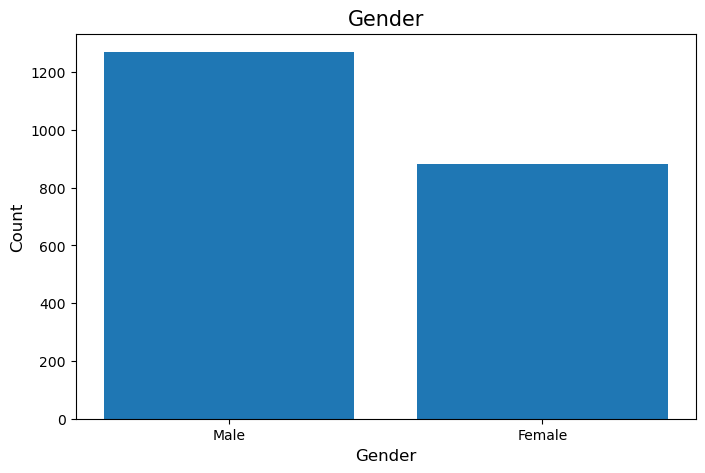

In [69]:
gender_data = df["Gender"].value_counts(normalize=False)
gender_level = gender_data.index

plt.figure(figsize=(8,5))
plt.bar(gender_level, gender_data)

plt.title("Gender", fontsize=15)
plt.xlabel("Gender", fontsize=12)
# plt.xticks(gender_level, ['Male', 'Female'])
plt.ylabel("Count", fontsize=12)
plt.show()

#### City
- **Key Observation(s)**: -

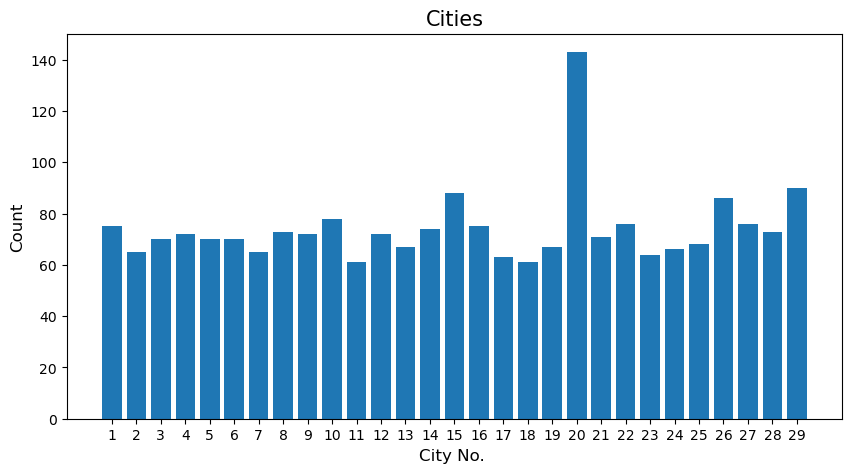

In [68]:
city_data = df["City_Encoded"].value_counts(normalize=False)
city_level = city_data.index

plt.figure(figsize=(10,5))
plt.bar(city_level, city_data)

plt.title("Cities", fontsize=15)
plt.xlabel("City No. ", fontsize=12)
plt.xticks(range(1, 30))
plt.ylabel("Count", fontsize=12)
plt.show()

#### Education
- **Key Observation(s)**: -

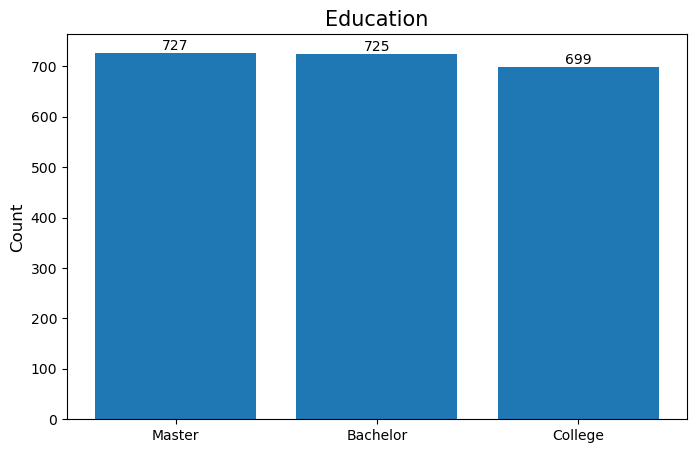

In [67]:
education_data = df["Education"].value_counts(normalize=False)
education_level = education_data.index

plt.figure(figsize=(8, 5))
bars = plt.bar(education_level, education_data)

for bar in bars:                               
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height()}', ha='center', va='bottom', fontsize=10)

plt.title("Education", fontsize=15)
# plt.xlabel("Level", fontsize=8)
# plt.xticks(education_data, [''])
plt.ylabel("Count", fontsize=12)
plt.show()

#### Salary
- **Key Observation(s)**: -

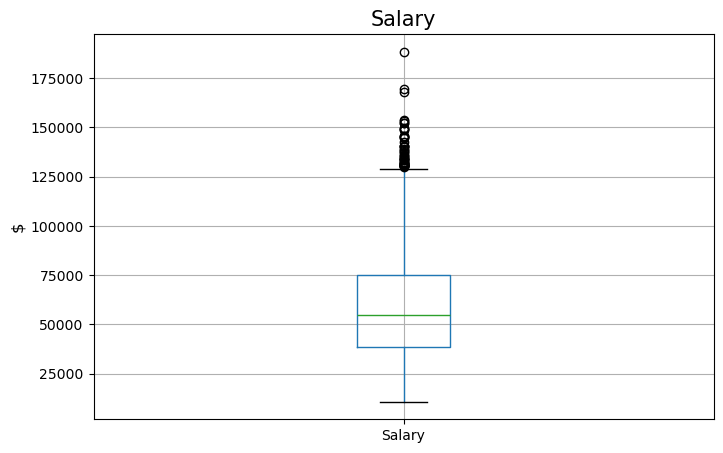

In [23]:
plt.figure(figsize=(8,5))
df[["Salary"]].boxplot()
plt.title("Salary", fontsize=15)
plt.ylabel("$", fontsize=12)
plt.show()

#### Join Designation
- **Key Observation(s)**: 
    - Employees rarely join with designation level 4 or 5 (1.95%)
    - An employee mostly likely joins with designation level 1 (44.21%)?
    - The majorit of employees join with designation level 1, 2 or 3 (98.05%)
    - For each subsequent designation level, the employee count at that designation level decreases, with a significant drop between level 3 and 4 

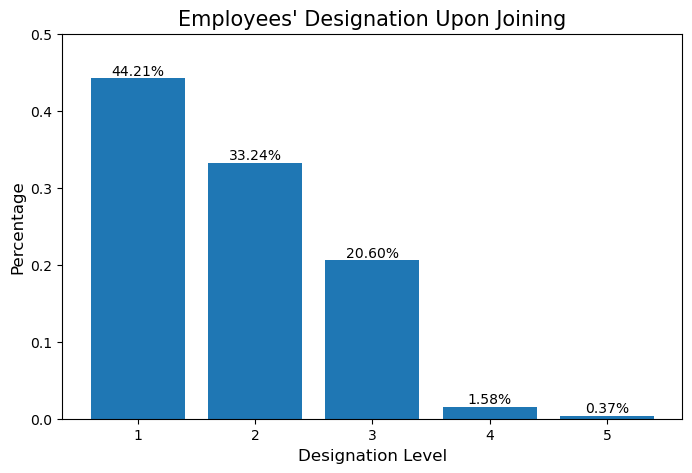

In [62]:
jd_data = df["Join_Designation"].value_counts(normalize=True)
jd_level = jd_data.index

plt.figure(figsize=(8, 5))                
bars = plt.bar(jd_level, jd_data)              

for bar in bars:                               
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.2%}', ha='center', va='bottom', fontsize=10)

plt.xlabel("Designation Level", fontsize=12)   
plt.ylabel("Percentage", fontsize=12)          
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5])
plt.title("Employees' Designation Upon Joining", fontsize=15) 
plt.show()

#### Designation
- **Key Observation(s)**: 
    - There is a significant drop in the number of employees at level 1 (11.81%)
    - All other designation levels experience an increase
    - Designation level 2 to 5 follows a similar trend as Join_Designation, with the same significant drop between level 3 and 4
    - Designation level 3 has the greatest jump (5.02%), followed by level 4 (4.18%)
    - Designation level 5 is still the smallest (0.98%) with the smallest increase (0.61%), suggesting [?]

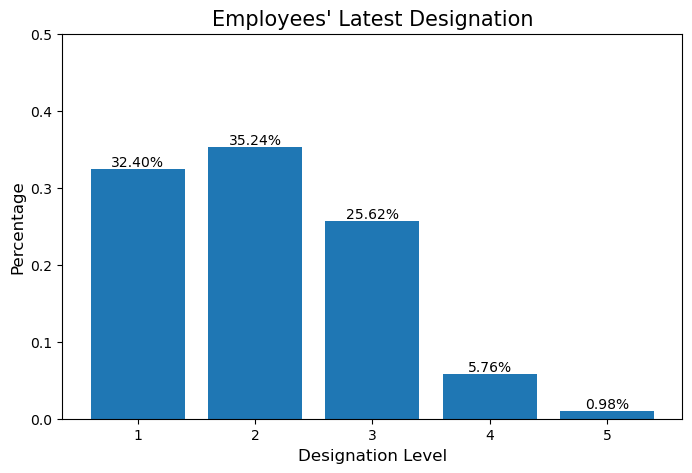

In [61]:
cd_data = df["Designation"].value_counts(normalize=True)
cd_level = cd_data.index

plt.figure(figsize=(8, 5))                  
bars = plt.bar(cd_level, cd_data)              

for bar in bars:                               
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.2%}', ha='center', va='bottom', fontsize=10)

plt.xlabel("Designation Level", fontsize=12)   
plt.ylabel("Percentage", fontsize=12)          
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5])
plt.title("Employees' Latest Designation", fontsize=15)  
plt.show()

#### Total Sales Accquired
- **Key Observation(s)**:
    - A significant number of employees (653) accuqired 0 total sales such that the lower quantile and lower bound are both 0
    - Among the outlier data
        - The majority are concentrated between upper bound (0.1x10^8) and 0.4x10^8 total sales
        - There is another grouping between 0.5x10^8 and 0.6x10^8 total sales
        - There is 3 distinct points after 0.6x10^8 total sales

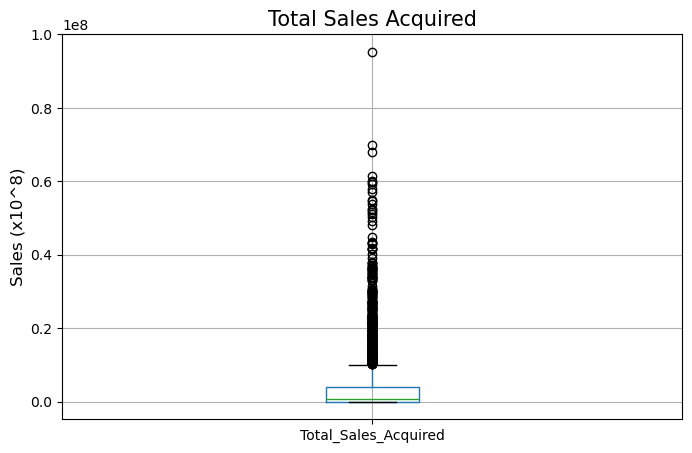

In [60]:
plt.figure(figsize=(8,5))
df[["Total_Sales_Acquired"]].boxplot()
plt.title("Total Sales Acquired", fontsize=15)
plt.ylabel("Sales (x10^8)", fontsize=12)
plt.show()

#### Quarterly Rating
- **Key Observation(s)**: -
    - Follows a logarithmic decrease, with a significant drop between rating 1 and 2
    - The majority of employees are given a quarterly rating of 1, suggesting [...]

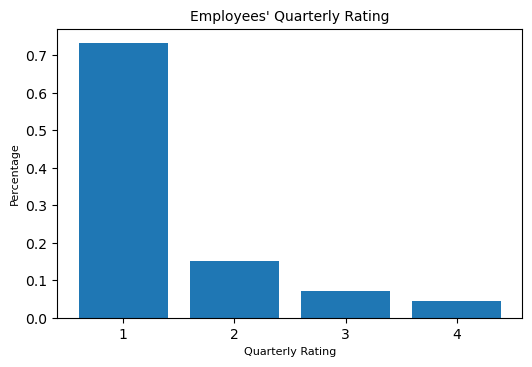

In [27]:
cd_data = df["Quarterly_Rating"].value_counts(normalize=True)

x_level = cd_data.index
y_percent = cd_data

plt.figure(figsize=(6,3.75))
plt.bar(x_level, y_percent)
plt.title("Employees' Quarterly Rating", fontsize=10)
plt.xlabel("Quarterly Rating", fontsize=8)
plt.xticks([1,2,3,4])
plt.ylabel("Percentage", fontsize=8)
plt.show()

**c.** Perform bi-variate analysis on the variables. You do not need to present the analysis of every pair of variables; only focus on the pairs you believe are worth investigating and explain. For each pair, describe the relationship between the two variables. Use appropriate statistical methods and/or visualizations.

**Response.** 

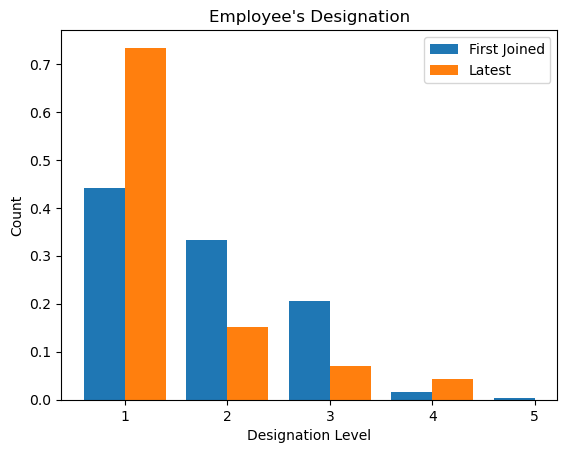

In [28]:
#Join_Designation-(Latest)Designation
plt.bar(jd_data.index - 0.2, jd_data, 0.4, label = 'First Joined') 
plt.bar(cd_data.index + 0.2, cd_data, 0.4, label = 'Latest') 
  
plt.title("Employee's Designation")
plt.xlabel("Designation Level") 
plt.ylabel("Count")  
plt.legend() 
plt.show() 

hello